In [1]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,1,2,3,4]]
data.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['date'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.iloc[:, [0,5,1,2,3,4]]

data_backup = data.loc[ data.timestamp >= 1675814400 ]
data = data.loc[ data.timestamp < 1675814400 ]

## highs & lows reloaded

In [2]:
for i in range(1,11):
    data[f'high+{i}'] = data['high'].shift(i)
for i in range(1,11):
    data[f'low+{i}'] = data['low'].shift(i)
data.dropna(axis=0, inplace=True)

In [3]:
inputs_highs = data.iloc[:, [6,7,8,9,10,11,12,13,14,15]]
target_highs = data.iloc[:, [3]]

inputs_lows = data.iloc[:, [16,17,18,19,20,21,22,23,24,25]]
target_lows = data.iloc[:, [4]]

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(inputs_highs, target_highs, test_size=0.2, random_state=1, shuffle=False)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(inputs_lows, target_lows, test_size=0.2, random_state=1, shuffle=False)

random_tree_highs = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_highs.fit(X_train_h, y_train_h)

random_tree_lows = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_lows.fit(X_train_l, y_train_l)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=1)

In [5]:
pred_highs = random_tree_highs.predict(X_test_h)
y_test_h['pred'] = pred_highs

pred_lows = random_tree_lows.predict(X_test_l)
y_test_l['pred'] = pred_lows

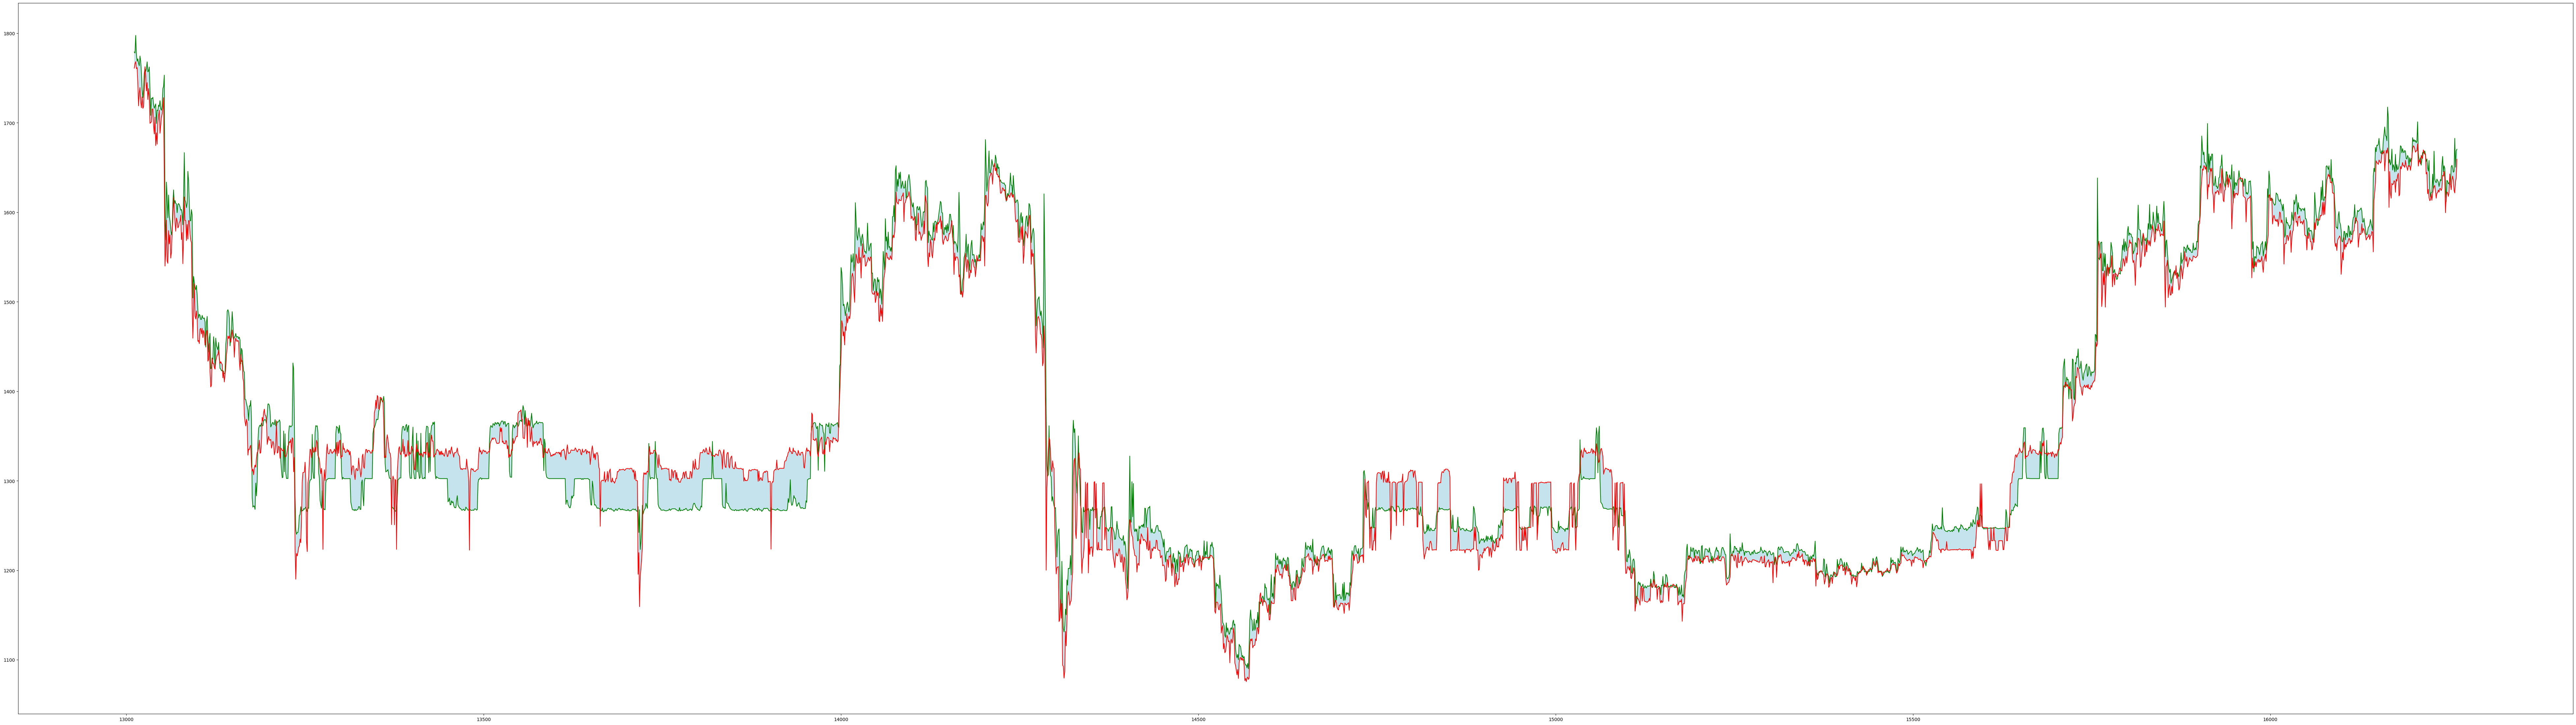

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x = y_test_h.index

plt.plot(y_test_h['pred'], color='green')
plt.plot(y_test_l['pred'], color='red')
plt.fill_between(x, y_test_h['pred'], y_test_l['pred'], color='lightblue', alpha=0.7)
plt.show()

## with backup data:

In [7]:
for i in range(1,11):
    data_backup[f'high+{i}'] = data_backup['high'].shift(i)
for i in range(1,11):
    data_backup[f'low+{i}'] = data_backup['low'].shift(i)
data_backup.dropna(axis=0, inplace=True)

In [8]:
inputs_highs_backup = data_backup.iloc[:, [6,7,8,9,10,11,12,13,14,15]]
target_highs_backup = data_backup.iloc[:, [3]]

inputs_lows_backup = data_backup.iloc[:, [16,17,18,19,20,21,22,23,24,25]]
target_lows_backup = data_backup.iloc[:, [4]]

In [9]:
pred_highs_backup = random_tree_highs.predict(inputs_highs_backup)
pred_lows_backup = random_tree_lows.predict(inputs_lows_backup)

In [10]:
raw_data = data_backup.iloc[:, [0,1,2,3,4,5]]

In [11]:
raw_data['pred_highs'] = pred_highs_backup
raw_data['pred_lows'] = pred_lows_backup

/tmp/ipykernel_193070/3064913517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['pred_highs'] = pred_highs_backup
/tmp/ipykernel_193070/3064913517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['pred_lows'] = pred_lows_backup


In [12]:
score = mean_squared_error(raw_data['high'], raw_data['pred_highs'])
print(score)

132.4803170687515


In [13]:
raw_data['pred_highs'] = raw_data['pred_highs'].shift(1)
raw_data['pred_lows'] = raw_data['pred_lows'].shift(1)

/tmp/ipykernel_193070/64126232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['pred_highs'] = raw_data['pred_highs'].shift(1)
/tmp/ipykernel_193070/64126232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['pred_lows'] = raw_data['pred_lows'].shift(1)


In [14]:
raw_data

timestamp                date     open     high      low    close  \
16272  1675850400 2023-02-08 10:00:00  1673.33  1673.50  1667.67  1670.94   
16273  1675854000 2023-02-08 11:00:00  1670.94  1676.56  1670.01  1674.11   
16274  1675857600 2023-02-08 12:00:00  1674.12  1677.60  1669.34  1671.90   
16275  1675861200 2023-02-08 13:00:00  1671.90  1676.94  1668.30  1674.81   
16276  1675864800 2023-02-08 14:00:00  1674.81  1683.12  1661.40  1671.58   
...           ...                 ...      ...      ...      ...      ...   
24354  1707336000 2024-02-07 20:00:00  2418.66  2445.00  2418.66  2438.64   
24355  1707339600 2024-02-07 21:00:00  2438.64  2439.27  2424.86  2429.71   
24356  1707343200 2024-02-07 22:00:00  2429.71  2431.16  2421.03  2424.75   
24357  1707346800 2024-02-07 23:00:00  2424.76  2429.61  2421.81  2424.22   
24358  1707350400 2024-02-08 00:00:00  2424.21  2436.96  2422.69  2433.89   

       pred_highs  pred_lows  
16272         NaN        NaN  
16273   1661.3270  1667.1051  
16274   1659.6476  1666.0183  
16275   1674.5796  1667.8128  
16276   1685.5770  1665.5647  
...           ...        ...  
24354   2415.2206  2414.9144  
24355   2415.0358  2413.8580  
24356   2460.0825  2412.3184  
24357   2445.1845  2434.0722  
24358   2434.5980  2429.0892  

[8087 rows x 8 columns]

In [15]:
raw_data.to_excel('raw_data_1.xlsx')

## highs & lows: 20 bar lag

In [16]:
import pandas as pd

data2 = pd.read_csv('data_sample_three_years.csv')

data2 = data2.iloc[:, [0,1,2,3,4]]
data2.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data2['date'] = pd.to_datetime(data2['timestamp'], unit='s')
data2 = data2.iloc[:, [0,5,1,2,3,4]]

data_backup2 = data2.loc[ data2.timestamp >= 1675814400 ]
data2 = data2.loc[ data2.timestamp < 1675814400 ]

for i in range(1,21):
    data2[f'high+{i}'] = data2['high'].shift(i)
for i in range(1,21):
    data2[f'low+{i}'] = data2['low'].shift(i)
data2.dropna(axis=0, inplace=True)

inputs_highs2 = data2.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
target_highs2 = data2.iloc[:, [3]]

inputs_lows2 = data2.iloc[:, [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]
target_lows2 = data2.iloc[:, [4]]

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor

X_train_h2, X_test_h2, y_train_h2, y_test_h2 = train_test_split(inputs_highs2, target_highs2, test_size=0.2, random_state=1, shuffle=False)
X_train_l2, X_test_l2, y_train_l2, y_test_l2 = train_test_split(inputs_lows2, target_lows2, test_size=0.2, random_state=1, shuffle=False)

random_tree_highs2 = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_highs2.fit(X_train_h2, y_train_h2)

random_tree_lows2 = RandomForestRegressor(n_estimators=100, random_state=1)
random_tree_lows2.fit(X_train_l2, y_train_l2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=1)

In [18]:
pred_highs2 = random_tree_highs2.predict(X_test_h2)
y_test_h2['pred'] = pred_highs2

pred_lows2 = random_tree_lows2.predict(X_test_l2)
y_test_l2['pred'] = pred_lows2

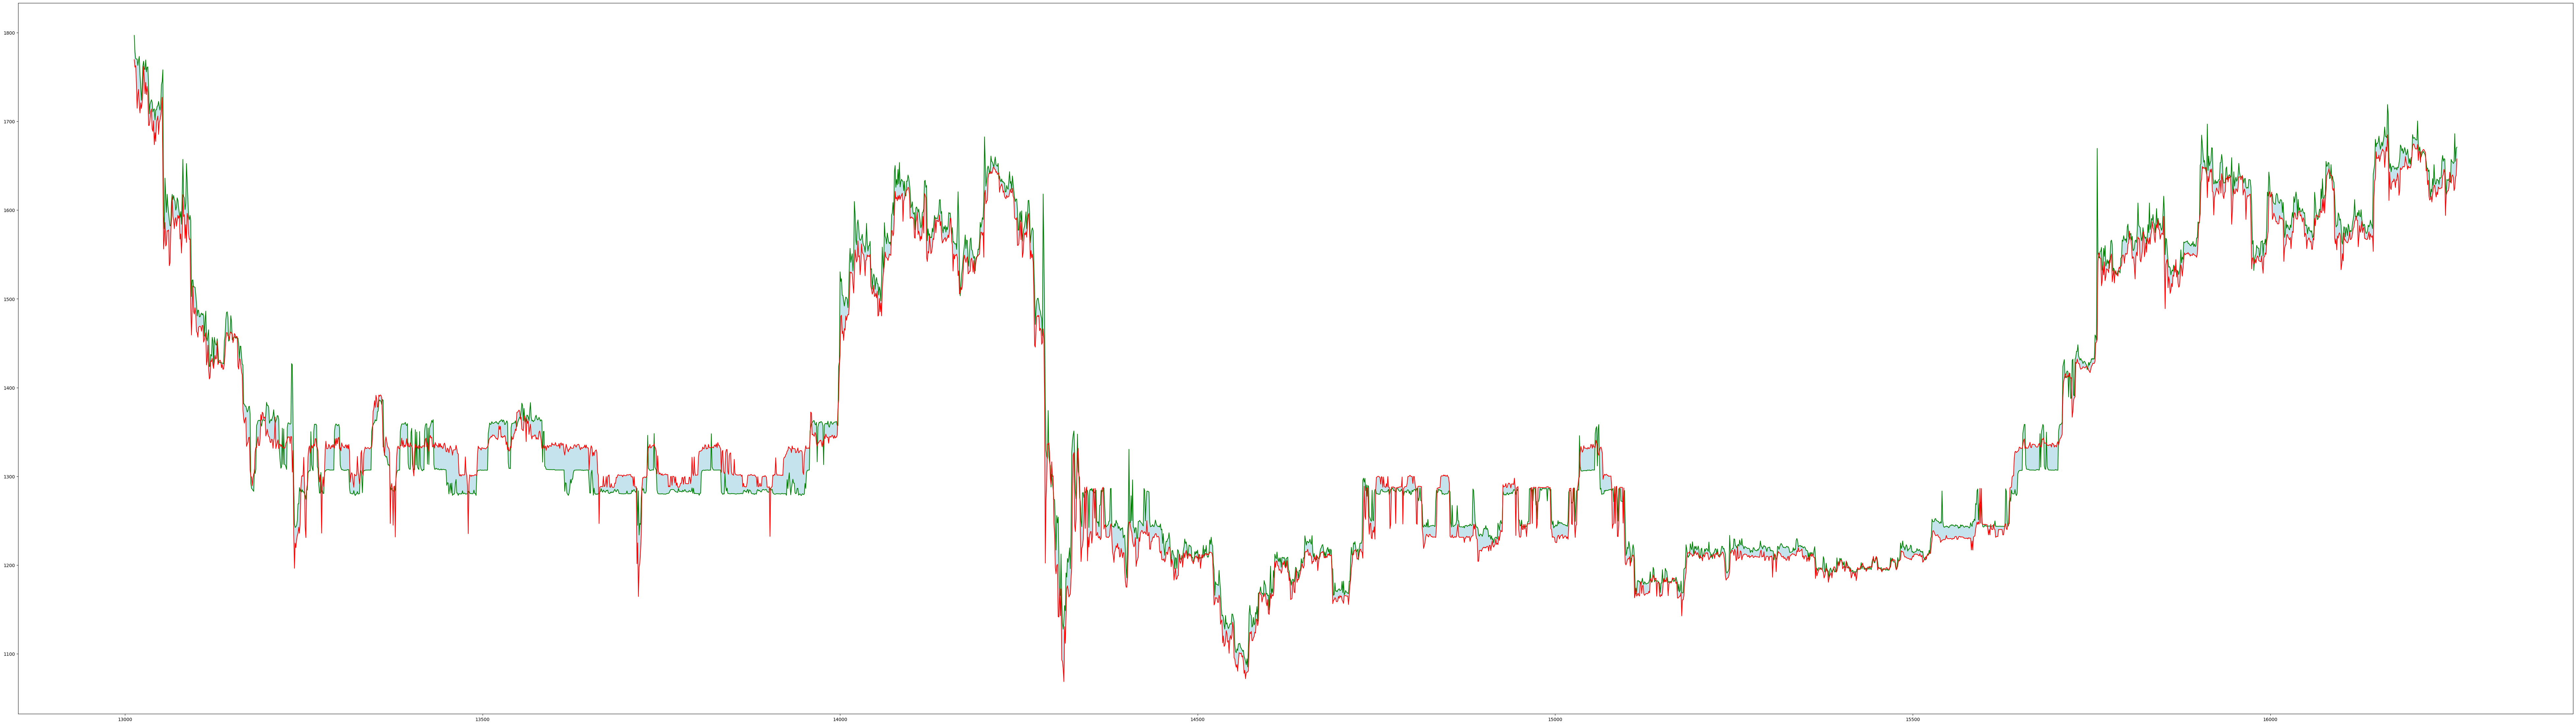

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x2 = y_test_h2.index

plt.plot(y_test_h2['pred'], color='green')
plt.plot(y_test_l2['pred'], color='red')
plt.fill_between(x2, y_test_h2['pred'], y_test_l2['pred'], color='lightblue', alpha=0.7)
plt.show()

## with backup data:

In [20]:
for i in range(1,21):
    data_backup2[f'high+{i}'] = data_backup2['high'].shift(i)
for i in range(1,21):
    data_backup2[f'low+{i}'] = data_backup2['low'].shift(i)
data_backup2.dropna(axis=0, inplace=True)

inputs_highs_backup2 = data_backup2.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
target_highs_backup2 = data_backup2.iloc[:, [3]]

inputs_lows_backup2 = data_backup2.iloc[:, [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]]
target_lows_backup2 = data_backup2.iloc[:, [4]]

pred_highs_backup2 = random_tree_highs2.predict(inputs_highs_backup2)
pred_lows_backup2 = random_tree_lows2.predict(inputs_lows_backup2)

In [21]:
raw_data2 = data_backup2.iloc[:, [0,1,2,3,4,5]]

raw_data2['pred_highs'] = pred_highs_backup2
raw_data2['pred_lows'] = pred_lows_backup2

raw_data2['pred_highs'] = raw_data2['pred_highs'].shift(1)
raw_data2['pred_lows'] = raw_data2['pred_lows'].shift(1)

/tmp/ipykernel_193070/1976934131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['pred_highs'] = pred_highs_backup2
/tmp/ipykernel_193070/1976934131.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['pred_lows'] = pred_lows_backup2
/tmp/ipykernel_193070/1976934131.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [22]:
raw_data2.head(20)

timestamp                date     open     high      low    close  \
16282  1675893600 2023-02-08 22:00:00  1652.72  1655.74  1650.60  1650.63   
16283  1675897200 2023-02-08 23:00:00  1650.64  1653.59  1641.96  1650.26   
16284  1675900800 2023-02-09 00:00:00  1650.26  1655.48  1645.50  1654.26   
16285  1675904400 2023-02-09 01:00:00  1654.26  1656.20  1649.74  1651.34   
16286  1675908000 2023-02-09 02:00:00  1651.34  1651.78  1631.56  1632.17   
16287  1675911600 2023-02-09 03:00:00  1632.18  1633.20  1608.10  1618.97   
16288  1675915200 2023-02-09 04:00:00  1618.97  1627.60  1610.16  1624.13   
16289  1675922400 2023-02-09 06:00:00  1628.01  1636.95  1625.51  1634.12   
16290  1675926000 2023-02-09 07:00:00  1634.11  1635.55  1629.47  1629.98   
16291  1675929600 2023-02-09 08:00:00  1629.99  1637.60  1629.98  1632.47   
16292  1675933200 2023-02-09 09:00:00  1632.46  1636.36  1630.11  1634.81   
16293  1675940400 2023-02-09 11:00:00  1633.09  1639.99  1630.07  1632.90   
16294  1675944000 2023-02-09 12:00:00  1632.89  1643.55  1625.44  1636.20   
16295  1675947600 2023-02-09 13:00:00  1636.15  1642.42  1633.87  1640.11   
16296  1675951200 2023-02-09 14:00:00  1640.11  1649.00  1635.10  1637.35   
16297  1675954800 2023-02-09 15:00:00  1637.36  1640.33  1628.00  1632.25   
16298  1675958400 2023-02-09 16:00:00  1632.24  1633.75  1616.96  1623.00   
16299  1675962000 2023-02-09 17:00:00  1623.00  1629.56  1615.83  1623.72   
16300  1675965600 2023-02-09 18:00:00  1623.72  1631.46  1620.00  1622.04   
16301  1675972800 2023-02-09 20:00:00  1579.08  1581.87  1564.52  1576.89   

       pred_highs  pred_lows  
16282         NaN        NaN  
16283   1646.1296  1639.2330  
16284   1647.7687  1633.0877  
16285   1645.8888  1636.1039  
16286   1648.4603  1641.2157  
16287   1648.8998  1637.1171  
16288   1647.5219  1635.6041  
16289   1628.7567  1613.6096  
16290   1629.4781  1611.5296  
16291   1635.6336  1617.1766  
16292   1629.0010  1624.2847  
16293   1631.4835  1623.9175  
16294   1631.4533  1627.5364  
16295   1631.7662  1627.3897  
16296   1649.7001  1624.6245  
16297   1650.7293  1633.7866  
16298   1654.3769  1632.0780  
16299   1636.7385  1628.7079  
16300   1633.7336  1616.3948  
16301   1632.8578  1616.1150

In [23]:
raw_data2.to_excel('raw_data_2.xlsx')

## graphs to test:

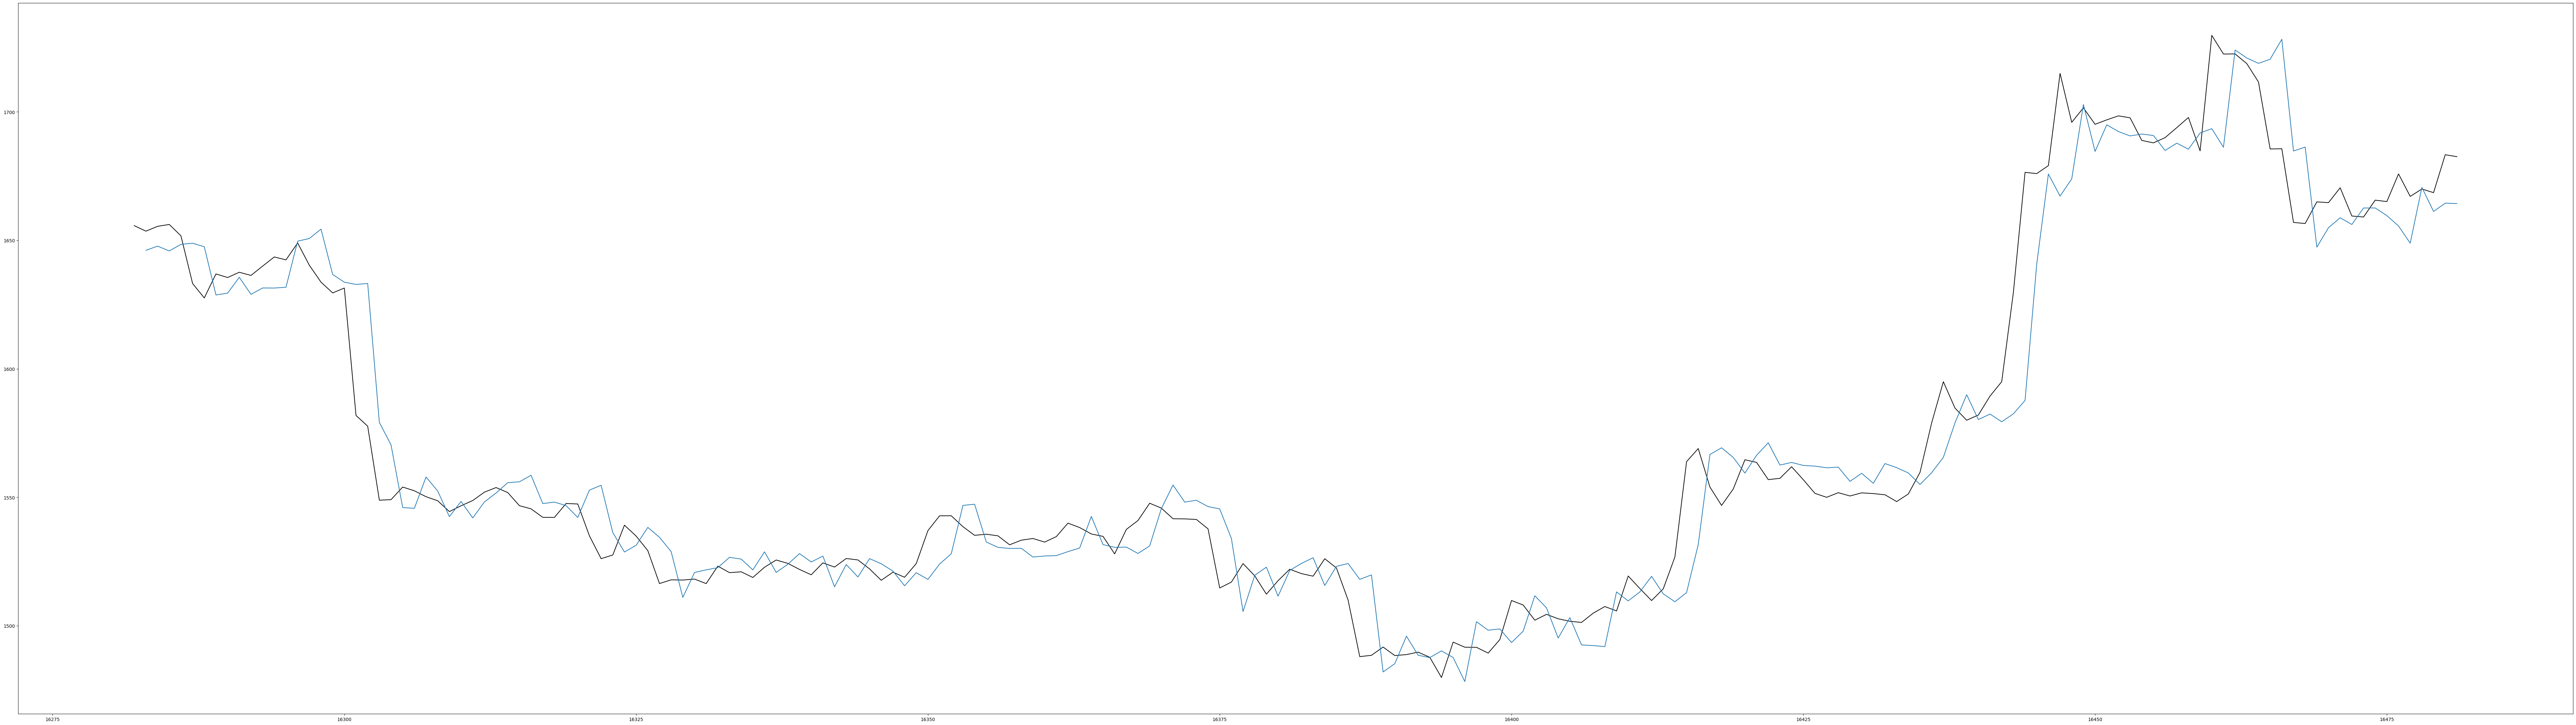

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(raw_data2['high'].iloc[:200], color='black')
plt.plot(raw_data2['pred_highs'].iloc[:200])
#plt.show()
plt.savefig('test1.png')

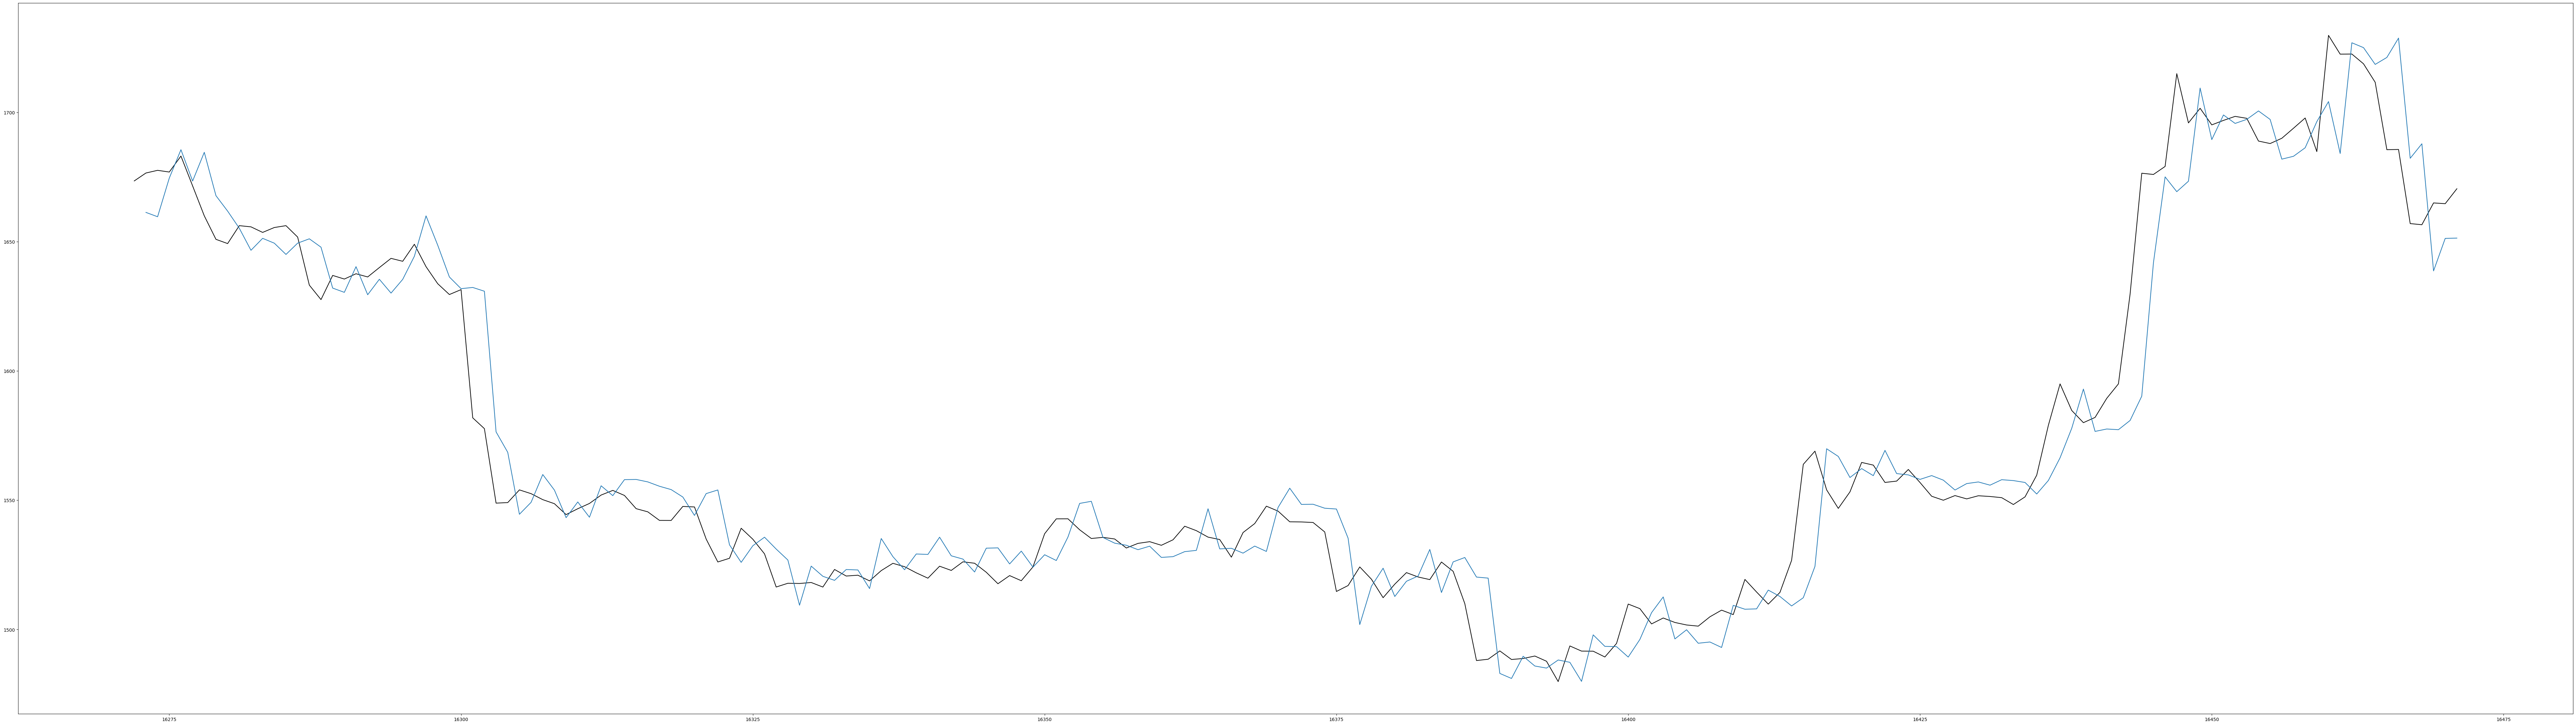

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

plt.plot(raw_data['high'].iloc[:200], color='black')
plt.plot(raw_data['pred_highs'].iloc[:200])
#plt.show()
plt.savefig('test2.png')

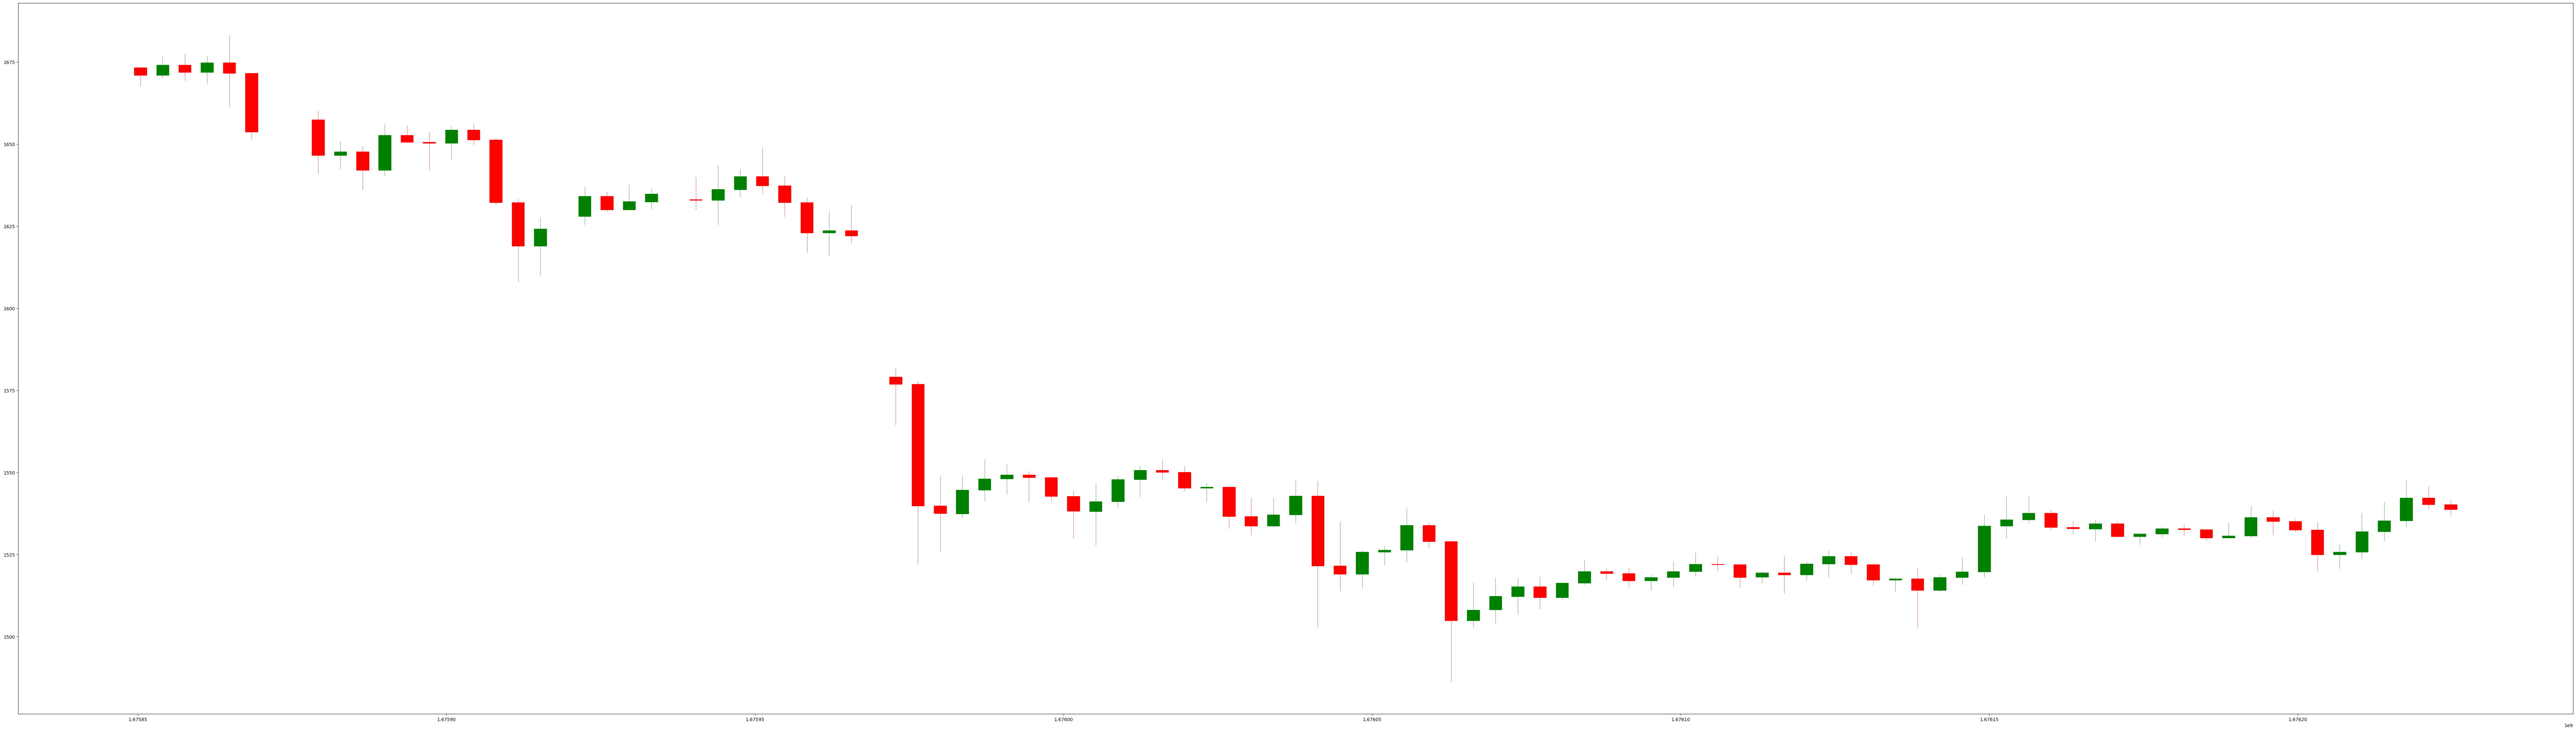

In [26]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(100, 28))

# Plot candlestick chart
candlestick_ohlc(ax, zip(raw_data['timestamp'].iloc[:100], raw_data['open'].iloc[:100], raw_data['high'].iloc[:100], raw_data['low'].iloc[:100], raw_data['close'].iloc[:100]), width=2000, colorup='green', colordown='red')
#plt.show()
plt.savefig('test3.png')

In [27]:
raw_data.head(20)

timestamp                date     open     high      low    close  \
16272  1675850400 2023-02-08 10:00:00  1673.33  1673.50  1667.67  1670.94   
16273  1675854000 2023-02-08 11:00:00  1670.94  1676.56  1670.01  1674.11   
16274  1675857600 2023-02-08 12:00:00  1674.12  1677.60  1669.34  1671.90   
16275  1675861200 2023-02-08 13:00:00  1671.90  1676.94  1668.30  1674.81   
16276  1675864800 2023-02-08 14:00:00  1674.81  1683.12  1661.40  1671.58   
16277  1675868400 2023-02-08 15:00:00  1671.58  1671.58  1651.57  1653.69   
16278  1675879200 2023-02-08 18:00:00  1657.40  1660.00  1641.08  1646.62   
16279  1675882800 2023-02-08 19:00:00  1646.61  1650.91  1642.42  1647.71   
16280  1675886400 2023-02-08 20:00:00  1647.71  1649.27  1636.22  1642.06   
16281  1675890000 2023-02-08 21:00:00  1642.05  1656.20  1640.28  1652.72   
16282  1675893600 2023-02-08 22:00:00  1652.72  1655.74  1650.60  1650.63   
16283  1675897200 2023-02-08 23:00:00  1650.64  1653.59  1641.96  1650.26   
16284  1675900800 2023-02-09 00:00:00  1650.26  1655.48  1645.50  1654.26   
16285  1675904400 2023-02-09 01:00:00  1654.26  1656.20  1649.74  1651.34   
16286  1675908000 2023-02-09 02:00:00  1651.34  1651.78  1631.56  1632.17   
16287  1675911600 2023-02-09 03:00:00  1632.18  1633.20  1608.10  1618.97   
16288  1675915200 2023-02-09 04:00:00  1618.97  1627.60  1610.16  1624.13   
16289  1675922400 2023-02-09 06:00:00  1628.01  1636.95  1625.51  1634.12   
16290  1675926000 2023-02-09 07:00:00  1634.11  1635.55  1629.47  1629.98   
16291  1675929600 2023-02-09 08:00:00  1629.99  1637.60  1629.98  1632.47   

       pred_highs  pred_lows  
16272         NaN        NaN  
16273   1661.3270  1667.1051  
16274   1659.6476  1666.0183  
16275   1674.5796  1667.8128  
16276   1685.5770  1665.5647  
16277   1673.4570  1666.0300  
16278   1684.5703  1661.2311  
16279   1667.7971  1647.4158  
16280   1661.8294  1651.0064  
16281   1655.2003  1651.0950  
16282   1646.6736  1631.0552  
16283   1651.2969  1640.5895  
16284   1649.4216  1626.0497  
16285   1645.0687  1633.3024  
16286   1649.4371  1646.1962  
16287   1651.1127  1635.0836  
16288   1647.8752  1638.6791  
16289   1632.0580  1613.1624  
16290   1630.4043  1613.6803  
16291   1640.3449  1619.3247